<a href="https://colab.research.google.com/github/maleehasiddiqui20/dataprojects/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset # this method will help us to #download the Titanic datasetimport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset # this method will help us to #download the Titanic dataset
plt.style.use('ggplot') # check for more with plt.style.available

In [ ]:
data = load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**Playing with dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
data.shape

(891, 15)

In [ ]:
data.groupby ('survived').size()

survived
0    549
1    342
dtype: int64

In [ ]:
columns = data.columns.values
for i in columns:
  print(data.groupby (i).size())
  print()

survived
0    549
1    342
dtype: int64

pclass
1    216
2    184
3    491
dtype: int64

sex
female    314
male      577
dtype: int64

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 88, dtype: int64

sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Length: 248, dtype: int64

embarked
C    168
Q     77
S    644
dtype: int64

class
First     216
Second    184
Third     491
dtype: int64

who
child     83
man      537
woman    271
dtype: int64

adult_male
False    354
True     537
dtype: int64

deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
dtype: int64

embark_town
Cherbourg      168
Queenstown      77
Southa

Data Visualization:

<Axes: xlabel='survived', ylabel='count'>

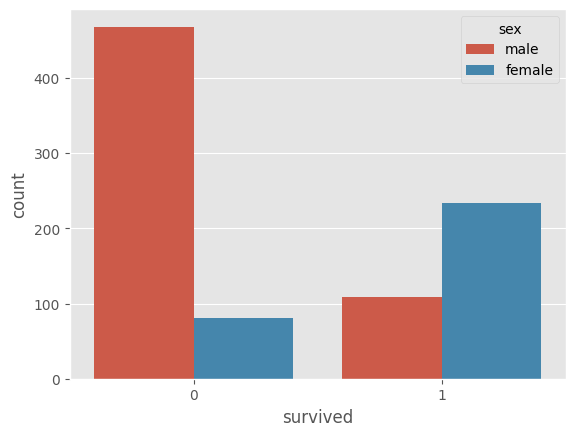

In [ ]:
sns.countplot (x ="survived", hue = "sex", data=data)
#More female survived than men

<Axes: xlabel='survived', ylabel='count'>

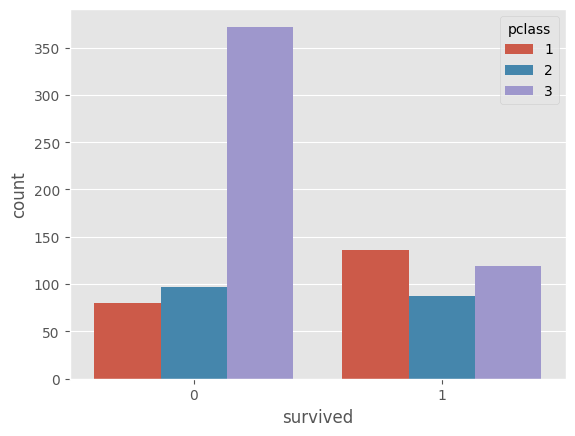

In [ ]:
sns.countplot (x ="survived", hue = "pclass", data = data)
#more third class passengers died

<Axes: >

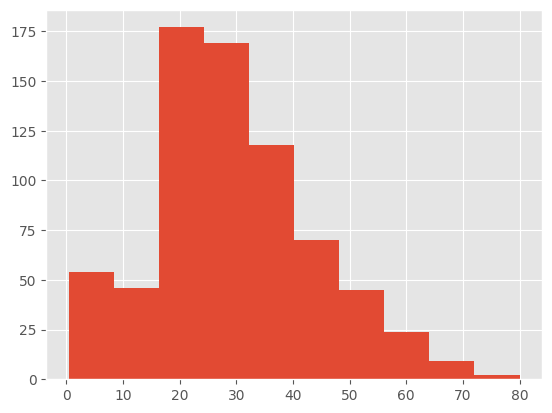

In [ ]:
data["age"]. hist ()

<Axes: xlabel='survived', ylabel='count'>

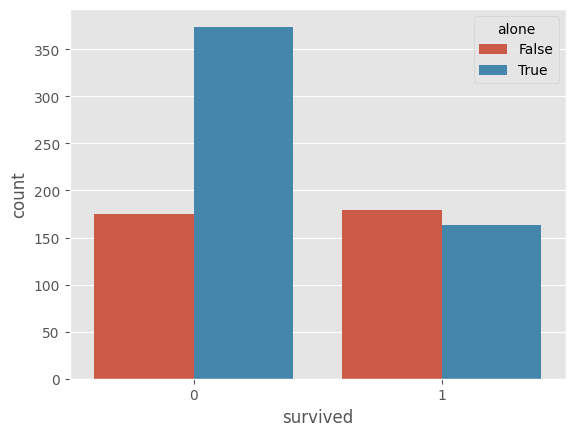

In [ ]:
sns.countplot (x ="survived", hue = "alone", data=data)
#more alone died

<Axes: xlabel='survived', ylabel='count'>

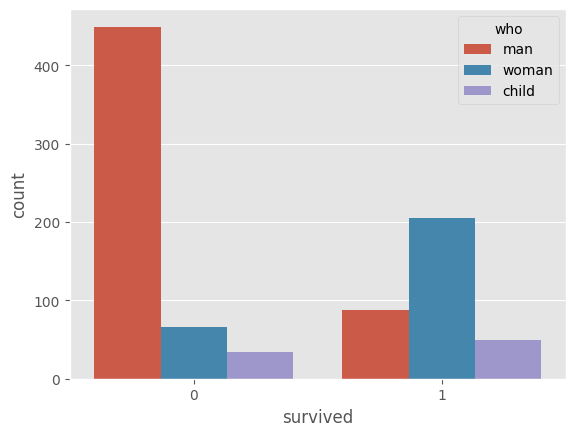

In [ ]:
sns.countplot (x ="survived", hue = "who", data=data)
#more man died

<Axes: xlabel='pclass', ylabel='age'>

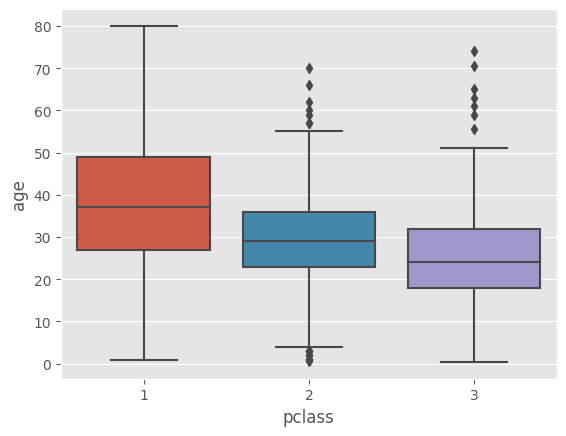

In [ ]:
sns.boxplot( x = 'pclass', y = 'age', data = data)
#first and second class passengers were older

**Data cleaning**

In [ ]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
mean = data['age'].mean()
data['age'].fillna(mean, inplace=True)

In [ ]:
#removing deck because too many null values
data.drop("deck",inplace=True,axis=1)

In [ ]:
#removing rows with null values (only 2)
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64